In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import *
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

<h1> Unsupervised </h1>

In [3]:
X = load_iris().data[:,:2]
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [7]:
import time

def timeit(method):
    avg = 0
    for _ in range(1000):
        start = time.time()
        nbrs = NearestNeighbors(n_neighbors=30, algorithm=method).fit(X)
        distances, indices = nbrs.kneighbors(X)
        avg += time.time()-start
    return avg/1000

methods = ['ball_tree', 'kd_tree', 'brute']
times = [timeit(method) for method in methods]
for method in methods:
    print(f"{method}: {timeit(method)*1000} ms")

ball_tree: 0.4456467628479004 ms
kd_tree: 0.4338552951812744 ms
brute: 2.0854687690734863 ms


<h1> NCA </h1>

requires_y=True (not the case for others) because it is optimizing for the libgfs func with scipy's libgfs solver

In [81]:
'''
helpers
'''
from scipy.special import logsumexp
from matplotlib import cm

def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum("ij,ij->i", diff_embedded, diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use the log-sum-exp trick to
    # avoid numerical instabilities
    exp_dist_embedded = np.exp(-dist_embedded - logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]), linewidth=50 * thickness[j])

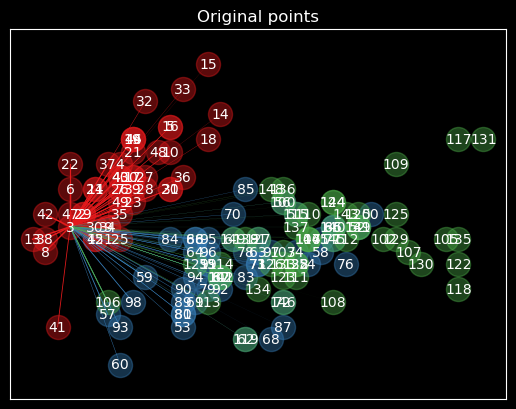

In [82]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X,y = load_iris(return_X_y=True)
X = X[:,:2]

plt.figure(1)
ax = plt.gca()
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], str(i), va="center", ha="center")
    ax.scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax.set_title("Original points")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis("equal")  # so that boundaries are displayed correctly as circles
i=3
relate_point(X, i, plt.gca())

(-157.95041001595735,
 -52.45238450038632,
 -32.64032185540227,
 -15.826970798115294)

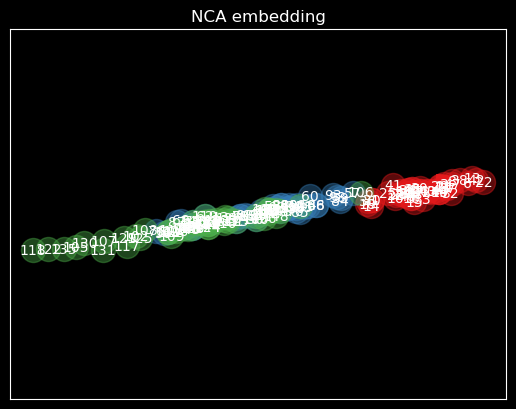

In [83]:

nbrs = NeighborhoodComponentsAnalysis().fit(X, y)
X_embedded = nbrs.transform(X)

ax2 = plt.gca()
relate_point(X_embedded, i, ax2)

for i in range(len(X)):
    ax2.text(X_embedded[i, 0], X_embedded[i, 1], str(i), va="center", ha="center")
    ax2.scatter(X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis("equal")